In [26]:
from foundry.util.registry import Registry
import foundry.core.tree as tree
import foundry.core as F
import foundry.datasets.vision
import foundry.numpy as npx

registry = Registry()
foundry.datasets.vision.register_all(registry)
dataset = registry.create("cifar10")

normalizer = dataset.normalizer("hypercube")
train_data = dataset.split("train")
train_data = F.vmap(normalizer.normalize)(train_data.as_pytree())

X = train_data.pixels[:1024]
labels = train_data.label[:1024]

In [35]:
import foundry.util.tsne
import foundry.random
import jax

tsne = foundry.util.tsne.randomized_tsne(
    X,
    rng_key=foundry.random.key(42),
    perplexity=20,
    n_iter=4096,
    learning_rate=100,
    allow_subsampling=False
)
print(tsne.learning_rate, tsne.betas)

100 [0.01939351 0.01973157 0.010386   ... 0.01414357 0.01361625 0.00920981]


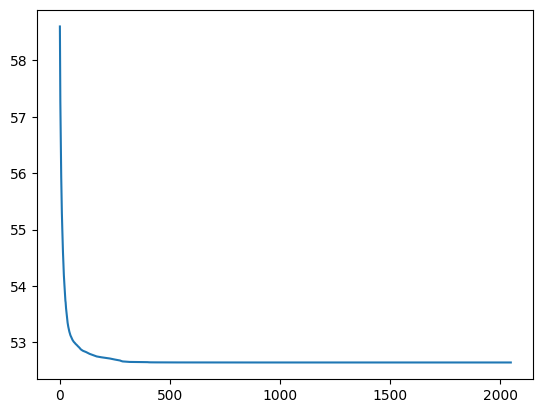

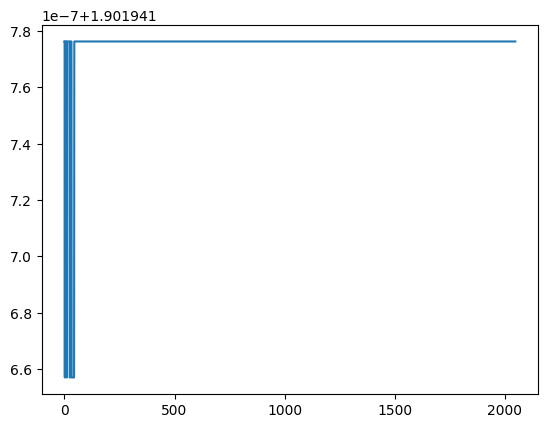

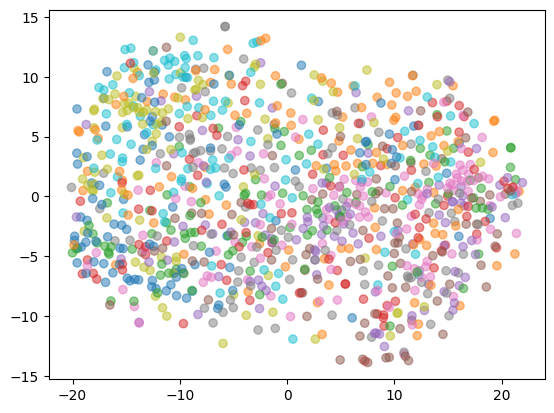

In [36]:
import matplotlib.pyplot as plt

T = tsne.loss_history.shape[0]
plt.plot(npx.arange(T//2), tsne.loss_history[:T//2])
plt.show()
plt.plot(npx.arange(T - T//2), tsne.loss_history[T//2:])
plt.show()
plt.scatter(tsne.embedding[:, 0], tsne.embedding[:, 1], c=labels, cmap="tab10", alpha=0.5)
plt.show()